In [1]:
!pip install paho-mqtt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 3.0 MB/s eta 0:00:00


In [3]:
import random
import time
import paho.mqtt.client as mqtt

# MQTT Configuration
channel_id = "2892082"
mqtt_host = "mqtt3.thingspeak.com"
mqtt_port = 1883
mqtt_user = "LggKISQ3DTMPMSwcOhYpODg"
mqtt_password = "FtEId/T+76s9sCBkXJVkf2y9"
client_id = "LggKISQ3DTMPMSwcOhYpODg"
topic = f"channels/{channel_id}/publish"

client = mqtt.Client(client_id=client_id)
client.username_pw_set(mqtt_user, password=mqtt_password)
client.connect(mqtt_host, mqtt_port, 60)

def generate_data():
    temp = round(random.uniform(-50, 50), 2)
    hum = round(random.uniform(0, 100), 2)
    co2 = round(random.uniform(300, 2000), 2)
    return temp, hum, co2

while True:
    temp, hum, co2 = generate_data()
    payload = f"field1={temp}&field2={hum}&field3={co2}"
    client.publish(topic, payload)
    print("Published:", payload)
    time.sleep(15)  # publish every 15 seconds


<ipython-input-3-5d30aa075456>:15: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client(client_id=client_id)


Published: field1=-34.81&field2=76.25&field3=1500.85
Published: field1=26.8&field2=62.45&field3=1198.45
Published: field1=19.68&field2=86.13&field3=1551.61
Published: field1=21.63&field2=49.7&field3=1500.7
Published: field1=23.61&field2=10.62&field3=841.6
Published: field1=24.34&field2=26.32&field3=409.85
Published: field1=-9.63&field2=33.98&field3=1982.99
Published: field1=20.66&field2=22.0&field3=474.57
Published: field1=-35.86&field2=74.18&field3=1665.51
Published: field1=42.41&field2=9.54&field3=1270.93
Published: field1=10.78&field2=6.37&field3=1741.59
Published: field1=12.14&field2=11.83&field3=1874.01
Published: field1=-29.21&field2=72.0&field3=306.0
Published: field1=14.47&field2=11.76&field3=1283.54
Published: field1=-24.29&field2=24.63&field3=1875.4
Published: field1=41.06&field2=61.0&field3=1223.23
Published: field1=-34.61&field2=94.57&field3=1234.09
Published: field1=29.32&field2=45.82&field3=929.77
Published: field1=-16.47&field2=84.18&field3=1115.55
Published: field1=-28.

KeyboardInterrupt: 

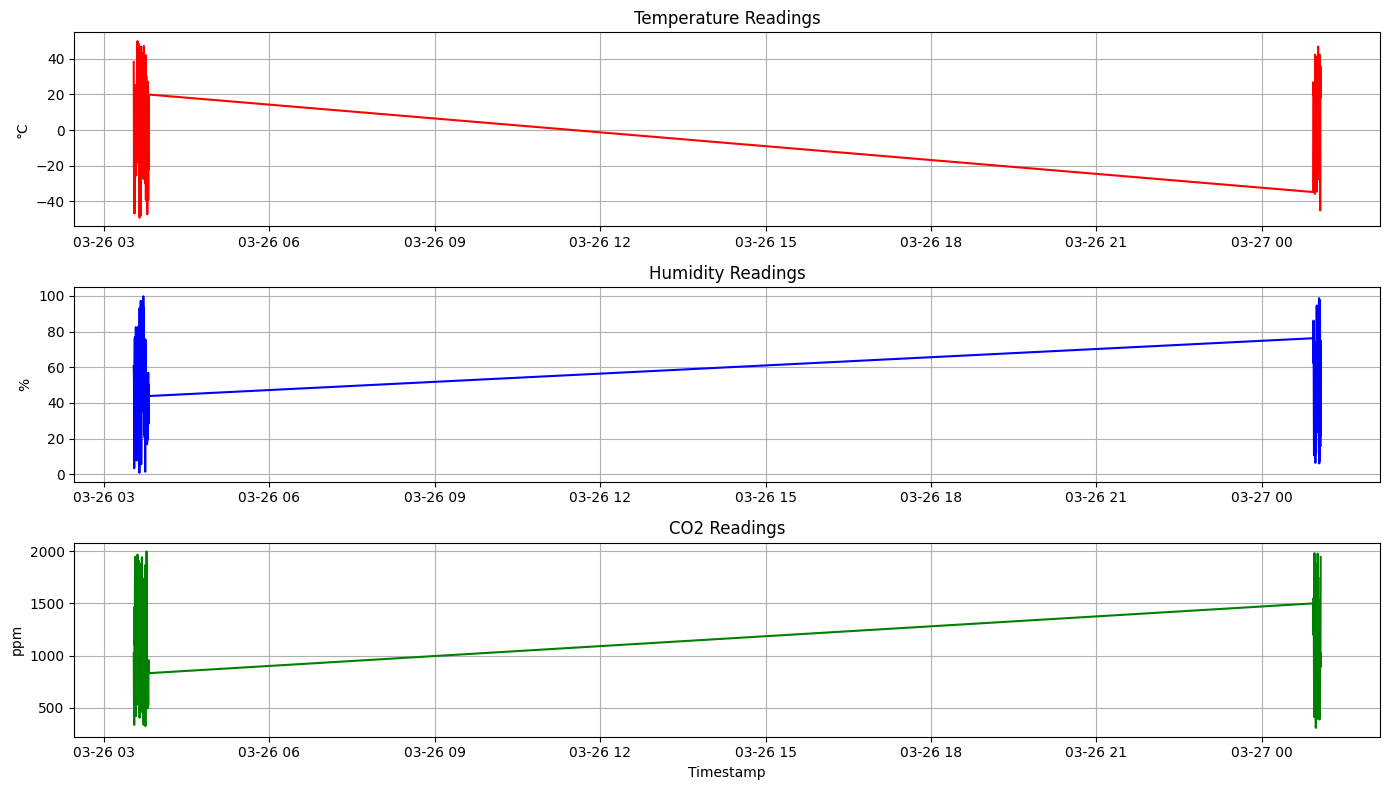

In [4]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# ThingSpeak Configuration
channel_id = "2892082"
read_api_key = "OU3AB0V98CIY5NGX"
base_url = "https://api.thingspeak.com/channels"

# Function to fetch data from a specific field
def fetch_data(field_num, label):
    url = f"{base_url}/{channel_id}/fields/{field_num}.json?api_key={read_api_key}&hours=5"
    response = requests.get(url)
    data = response.json()
    entries = data["feeds"]

    timestamps = [datetime.strptime(entry["created_at"], "%Y-%m-%dT%H:%M:%SZ") for entry in entries]
    values = [float(entry[f"field{field_num}"]) for entry in entries if entry[f"field{field_num}"]]

    return timestamps, values

# Fetch data
temp_time, temp_vals = fetch_data(1, "Temperature")
hum_time, hum_vals = fetch_data(2, "Humidity")
co2_time, co2_vals = fetch_data(3, "CO2")

# Plotting
plt.figure(figsize=(14, 8))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(temp_time, temp_vals, color='red', label='Temperature (°C)')
plt.ylabel('°C')
plt.title('Temperature Readings')
plt.grid(True)

# Humidity
plt.subplot(3, 1, 2)
plt.plot(hum_time, hum_vals, color='blue', label='Humidity (%)')
plt.ylabel('%')
plt.title('Humidity Readings')
plt.grid(True)

# CO2
plt.subplot(3, 1, 3)
plt.plot(co2_time, co2_vals, color='green', label='CO2 (ppm)')
plt.ylabel('ppm')
plt.title('CO2 Readings')
plt.xlabel('Timestamp')
plt.grid(True)

plt.tight_layout()
plt.show()
